In [31]:
import re
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore', category= DeprecationWarning)

import  matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette()

from plotly import tools
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)


In [2]:
train_data = pd.read_csv('datasets/train.csv')
test_data = pd.read_csv('datasets/test.csv')

In [3]:
print('', train_data.shape)
print('', test_data.shape)

 (5279, 4)
 (2924, 3)


In [6]:
train_data.columns

Index(['unique_hash', 'text', 'drug', 'sentiment'], dtype='object')

In [7]:
train_data.isnull().sum()

unique_hash    0
text           0
drug           0
sentiment      0
dtype: int64

In [8]:
train_data.unique_hash.value_counts()

105f4274252d0db119b66e1b5e74cc474b92fa99    1
a39a21f38de5defa53f8427f0132afe5b0be1ba7    1
037a9b261619048438f6622611404adb330405c2    1
55ea7f21b011d82e5c925a08cd7768afca8e7e00    1
0175042c33b7816c2dc8b0200a0a73bf1517f82e    1
55cf6a85e14c0e8a42ec3fb55ff6ed40e6237412    1
af81e7b3d73c398293ce8d363a0b986f998f6513    1
70f5f2017c317f14862bc63431d7c330a16a3bd2    1
360d99c0ef06e840e2674e7cac2779619bdc9504    1
457d62fee22190a8c042a1ba863cdaf83b2d9d85    1
8b46330dbea4e241b8d61c7186fb15a4b7b6a21c    1
48e66d7cf0a2edc97ca27cbbdbf959d2158939ad    1
8c5704cc65ee8f6f20fc6aa5b99b946a3ebcc4af    1
2b8c6417b832c312594df371b39fcda59e0c5fb3    1
28a53f366e713195388821705a19ee38db8eb364    1
cedf47ac5faf635809d4e0cac3017073f047fa37    1
11d9d04cc3bbd606f33bf432b3f63b2826dd2911    1
e80c7cd5539b6a3b3d13d27ae8ce8710d8c73e6e    1
57dce7c208c35af83c7baeb050c3cafadc9018e5    1
1732bce1c6c6245f26cb509d749a3cf3164b882a    1
918f23f517e067135b5c3d428b0c45e198ab145b    1
ab0d573dec5bbca4cb5c64911a2c628fcf

In [9]:
train_data.drug.value_counts()

ocrevus                         676
gilenya                         666
ocrelizumab                     441
entyvio                         303
humira                          270
fingolimod                      238
remicade                        229
opdivo                          224
tarceva                         218
cladribine                      200
keytruda                        199
stelara                         161
tagrisso                        161
alimta                          146
lucentis                         67
eylea                            65
avastin                          52
nivolumab                        50
cimzia                           48
alectinib                        43
crizotinib                       43
vitrectomy                       41
simponi                          39
erlotinib                        35
tecentriq                        34
pemetrexed                       33
xalkori                          33
tysabri                     

In [10]:
train_data.sentiment.value_counts()

2    3825
1     837
0     617
Name: sentiment, dtype: int64

In [11]:
data_all = train_data.append(test_data, ignore_index = True, sort = False)

In [12]:
data_all.head()

,unique_hash,text,drug,sentiment
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2.0
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2.0
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2.0
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2.0
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1.0


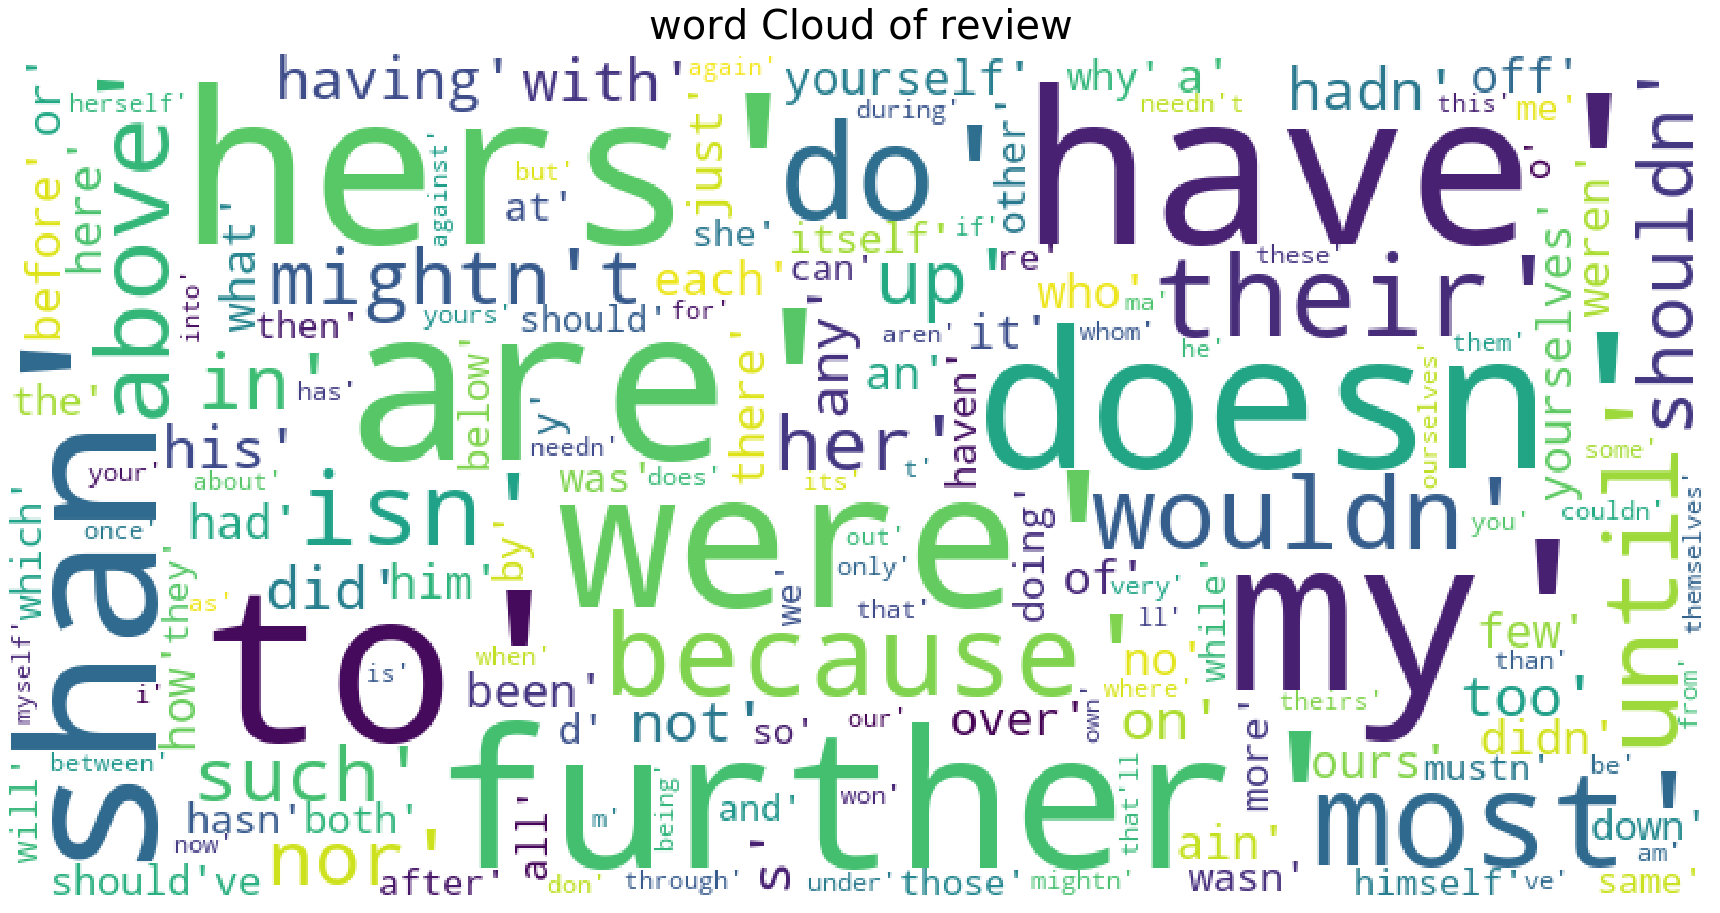

In [13]:
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

stops = set(stopwords.words('english'))

from wordcloud import WordCloud, STOPWORDS

def plot_wordcloud(text, mask = None,
                  max_words = 200,
                  max_font_size = 100,
                  figure_size = (24, 16),
                  title = None,
                  title_size = 40,
                  image_color = False):
    stopwords = set(STOPWORDS)
    more_stopwords = {"one", "br", "Po", "th", "sayi", "fo", "unknown"}
    stopwords = stopwords.union(more_stopwords)
    wordcloud = WordCloud(background_color = 'white',
                          stopwords = stopwords,
                          max_words = max_words,
                          max_font_size = max_font_size,
                          random_state = 42,
                          width = 800,
                          height = 400,
                          mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize = figure_size)
    if image_color:
        image_colors = ImageColorGenerate(mask);
        plt.imshow(wordcloud.recolor(color_func = image_colors), interpolation = 'bilinear');
        plt.title(title, fontdict ={'size': title_size,
                                   'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict ={'size': title_size,
                                    'color': 'black',
                                   'verticalalignment': 'bottom'})
        plt.axis('off')
        plt.tight_layout()
        
plot_wordcloud(stops, title = 'word Cloud of review')
    

In [14]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't",
            "haven't","isn't","mightn't","mustn't","needn't","no","nor","not",
            "shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [15]:
stemmer = SnowballStemmer('english')

def text_to_words(raw_text):
    original_text = BeautifulSoup(raw_text, 'html.parser').get_text()
    letter_only = re.sub('[^a-zA-Z]', ' ', raw_text)
    words = letter_only.lower().split()
    meaningful_words = [w for w in words if not w in stops]
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    return(' '.join(stemming_words))

data_all['clean_text'] = data_all['text'].apply(text_to_words)

In [16]:
data_all.head()

,unique_hash,text,drug,sentiment,clean_text
0,2e180be4c9214c1f5ab51fd8cc32bc80c9f612e0,Autoimmune diseases tend to come in clusters. ...,gilenya,2.0,autoimmun diseas tend come cluster gilenya fee...
1,9eba8f80e7e20f3a2f48685530748fbfa95943e4,I can completely understand why you’d want to ...,gilenya,2.0,complet understand want tri result report lect...
2,fe809672251f6bd0d986e00380f48d047c7e7b76,Interesting that it only targets S1P-1/5 recep...,fingolimod,2.0,interest target p receptor rather like fingoli...
3,bd22104dfa9ec80db4099523e03fae7a52735eb6,"Very interesting, grand merci. Now I wonder wh...",ocrevus,2.0,interest grand merci wonder lemtrada ocrevus s...
4,b227688381f9b25e5b65109dd00f7f895e838249,"Hi everybody, My latest MRI results for Brain ...",gilenya,1.0,hi everybodi latest mri result brain cervic co...


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

#df_train = data_all[:5280]
#df_test = data_all[5280:]

# splitting data into training and test set
df_train, df_test = train_test_split(data_all, test_size = 0.2, random_state = None)

vectorizer = CountVectorizer(analyzer = 'word',
                              tokenizer = None,
                             stop_words = None,
                             min_df = 2,
                             ngram_range = (4,4),
                             max_features = 20000)

In [27]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=20000, min_df=2,
                ngram_range=(4, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [28]:
pipeline = Pipeline([
    ('vect', vectorizer)
])

In [29]:
%time train_data_features = pipeline.fit_transform(df_train['clean_text'])
%time test_data_features = pipeline.fit_transform(df_test['clean_text'])

CPU times: user 14.4 s, sys: 627 ms, total: 15 s
Wall time: 21.2 s
CPU times: user 3.82 s, sys: 85.6 ms, total: 3.91 s
Wall time: 4.68 s


In [33]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

In [65]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import random

y_train = df_train['sentiment']
y_test = df_test['sentiment']
solution = y_test.copy()

#model structure
model = keras.models.Sequential()

model.add(keras.layers.Dense(200, input_shape = (20000,)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(1, activation = 'sigmoid'))

#model compile
model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

In [66]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 200)               4000200   
_________________________________________________________________
batch_normalization_15 (Batc (None, 200)               800       
_________________________________________________________________
activation_15 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_16 (Batc (None, 300)               1200      
_________________________________________________________________
activation_16 (Activation)   (None, 300)               0         
__________

In [67]:
# train the model
hist = model.fit(train_data_features, 
                 y_train, 
                 epochs = 10, 
                 batch_size = 64)
#prediction = model.predict(test_data_features)

Epoch 1/10
6562/6562 [==============================] - 70s 11ms/step - loss: nan - acc: 6.0957e-04
Epoch 2/10
6562/6562 [==============================] - 43s 7ms/step - loss: nan - acc: 0.0000e+00
Epoch 3/10
6562/6562 [==============================] - 43s 7ms/step - loss: nan - acc: 0.0000e+00
Epoch 4/10
6562/6562 [==============================] - 46s 7ms/step - loss: nan - acc: 0.0000e+00
Epoch 5/10
6562/6562 [==============================] - 44s 7ms/step - loss: nan - acc: 0.0000e+00
Epoch 6/10
6562/6562 [==============================] - 40s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 7/10
6562/6562 [==============================] - 40s 6ms/step - loss: nan - acc: 0.0000e+00
Epoch 8/10
6562/6562 [==============================] - 31s 5ms/step - loss: nan - acc: 0.0000e+00
Epoch 9/10
6562/6562 [==============================] - 31s 5ms/step - loss: nan - acc: 0.0000e+00
Epoch 10/10
6562/6562 [==============================] - 37s 6ms/step - loss: nan - acc: 0.0000e+00


In [68]:
sub_preds_deep = model.predict(test_data_features, batch_size = 32)

In [80]:
sub_preds_deep = np.zeros(df_test.shape[0])

In [81]:
sub_preds_deep

array([0., 0., 0., ..., 0., 0., 0.])

In [85]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, average_precision_score, f1_score
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix


target = df_train['sentiment']
features = ['clean_text']

sub_preds = np.zeros(df_test.shape[0])

X_train, X_val, y_train, y_val = train_test_split(df_train[features], target, test_size = 0.2, random_state = 42)
feature_importance_df = pd.DataFrame()

clf = LGBMClassifier(n_estimators = 2000,
                    learning_rate = 0.05,
                    num_leaves = 30,
                    subsample = .9,
                    max_depth = 7,
                    reg_alpha = 0.1,
                    reg_lambda = 0.1,
                    min_split_gain = 0.01,
                    min_child_weight = 2,
                    silent = -1,
                    verbose = -1)
clf.fit(X_train, y_train, 
       eval_set = [(X_train, y_train), (X_val, y_val)],
       verbose = 100, early_stopping_rounds = 100
    )
sub_preds = clf.predict(df_test[features])
fold_importance_df = pd.DataFrame()
fold_importance_df['feature'] = features
fold_importance_df['importance'] = clf.feature_importances_
feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis = 0)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').